<a href="https://colab.research.google.com/github/Tinycoder22/BasicDataScience/blob/main/exp12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Custom RNN Layer
class CustomRNN(Layer):
    def __init__(self, units):
        super(CustomRNN, self).__init__()
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer='random_normal',
                                      trainable=True)
        self.recurrent_kernel = self.add_weight(shape=(self.units, self.units),
                                                initializer='random_normal',
                                                trainable=True)
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = tf.matmul(inputs, self.kernel) + tf.matmul(prev_output, self.recurrent_kernel)
        output = tf.nn.relu(h)  # Using ReLU activation function
        return output, output

# Build a simple RNN model using the CustomRNN layer
model1 = tf.keras.Sequential([
    tf.keras.layers.RNN(CustomRNN(units=64), input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
model1.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 1.2433 - accuracy: 0.5161 - val_loss: 0.8865 - val_accuracy: 0.6477
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.7602 - accuracy: 0.7195 - val_loss: 0.6747 - val_accuracy: 0.7525
Epoch 3/10
375/375 [==============================] - 4s 9ms/step - loss: 0.6253 - accuracy: 0.7811 - val_loss: 0.5983 - val_accuracy: 0.7895
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.5769 - accuracy: 0.8000 - val_loss: 0.5366 - val_accuracy: 0.8143
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.5345 - accuracy: 0.8152 - val_loss: 0.5222 - val_accuracy: 0.8151
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.5169 - accuracy: 0.8188 - val_loss: 0.5087 - val_accuracy: 0.8219
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.5050 - ac

In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = model1.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')


313/313 - 1s - loss: 0.4751 - accuracy: 0.8295 - 874ms/epoch - 3ms/step
Test accuracy: 0.8295000195503235


313/313 [==============================] - 1s 3ms/step


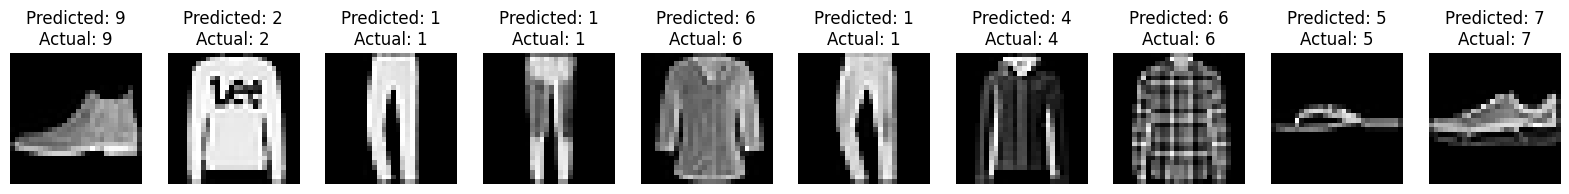

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions using the trained model
predictions = model1.predict(x_test)

# Visualize the predictions alongside the actual images and labels horizontally
num_images_to_visualize = 10
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(20, 2))

for i in range(num_images_to_visualize):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(y_test[i])}")
    axes[i].axis('off')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Custom RNN Layer
class CustomRNN(Layer):
    def __init__(self, units):
        super(CustomRNN, self).__init__()
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer='random_normal',
                                      trainable=True)
        self.recurrent_kernel = self.add_weight(shape=(self.units, self.units),
                                                initializer='random_normal',
                                                trainable=True)
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = tf.matmul(inputs, self.kernel) + tf.matmul(prev_output, self.recurrent_kernel)
        output = tf.nn.relu(h)  # Using ReLU activation function
        return output, output

# Build a deep RNN model using multiple instances of CustomRNN layer
model2 = tf.keras.Sequential([
    tf.keras.layers.RNN(CustomRNN(units=64), return_sequences=True, input_shape=(28, 28)),
    tf.keras.layers.RNN(CustomRNN(units=64), return_sequences=True),
    tf.keras.layers.RNN(CustomRNN(units=64)),
    Dense(10, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/10
375/375 [==============================] - 14s 30ms/step - loss: 1.2796 - accuracy: 0.4798 - val_loss: 0.9016 - val_accuracy: 0.6472
Epoch 2/10
375/375 [==============================] - 11s 28ms/step - loss: 0.7815 - accuracy: 0.7082 - val_loss: 0.6600 - val_accuracy: 0.7563
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.6329 - accuracy: 0.7728 - val_loss: 0.5749 - val_accuracy: 0.7963
Epoch 4/10
375/375 [==============================] - 10s 26ms/step - loss: 0.5640 - accuracy: 0.8024 - val_loss: 0.5210 - val_accuracy: 0.8171
Epoch 5/10
375/375 [==============================] - 10s 27ms/step - loss: 0.5102 - accuracy: 0.8229 - val_loss: 0.5052 - val_accuracy: 0.8312
Epoch 6/10
375/375 [==============================] - 11s 29ms/step - loss: 0.4783 - accuracy: 0.8347 - val_loss: 0.4683 - val_accuracy: 0.8402
Epoch 7/10
375/375 [==============================] - 11s 28ms/step - loss: 0.4490 - accuracy: 0.8429 - val_loss: 0.4776 - val_accuracy:

In [ ]:
# Make predictions using the trained model
predictions = model2.predict(x_test)
# Visualize the predictions alongside the actual images and labels horizont
num_images_to_visualize = 10
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(20, 2))
for i in range(num_images_to_visualize):
 axes[i].imshow(x_test[i], cmap='gray')
 axes[i].set_title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np
 axes[i].axis('off')
plt.show()